In [1]:
import pandas as pd

In [4]:
df= pd.read_csv('StudentPerformanceFactors.csv')

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<ipython-input-16-0e52df4dba73>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df,palette='husl')


Outliers detected:
       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
94               18          89                 High              Medium   
106              31         100               Medium              Medium   
113              35          99                 High                High   
209              43          86                 High              Medium   
217              19          70               Medium                 Low   
...             ...         ...                  ...                 ...   
6347             28          96                 High                 Low   
6393             16          83                  Low              Medium   
6431              4          60               Medium              Medium   
6522             18          90                 High                High   
6566             29          96                 High              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
94

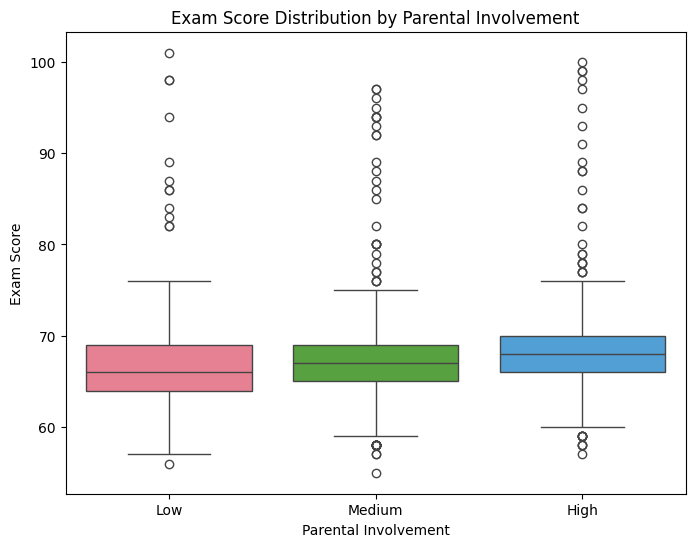

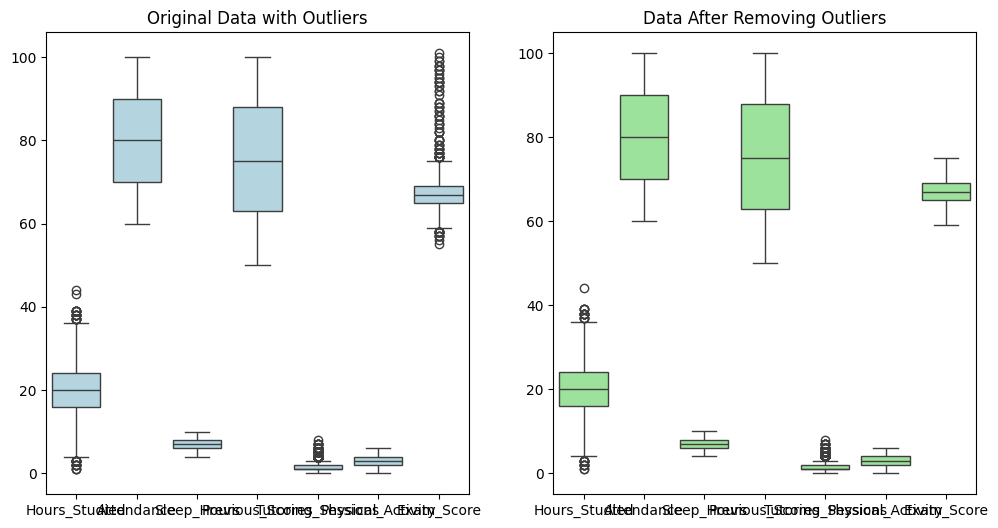

In [16]:
# @title Exam Score Distribution by Parental Involvement

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df,palette='husl')
plt.title('Exam Score Distribution by Parental Involvement')
plt.xlabel('Parental Involvement')
_ = plt.ylabel('Exam Score')
Q1 = np.percentile(df['Exam_Score'], 25)
Q3 = np.percentile(df['Exam_Score'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers based on 'Exam_Score'
outliers = df[(df['Exam_Score'] < lower_bound) | (df['Exam_Score'] > upper_bound)]

print("Outliers detected:\n", outliers)
filtered_data = df[(df['Exam_Score'] >= lower_bound) & (df['Exam_Score'] <= upper_bound)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, color='lightblue')
plt.title("Original Data with Outliers")
plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_data, color='lightgreen')
plt.title("Data After Removing Outliers")
print("Original data length:", len(df))
print("Filtered data length:", len(filtered_data))
print("Removed outliers:", len(df) - len(filtered_data))

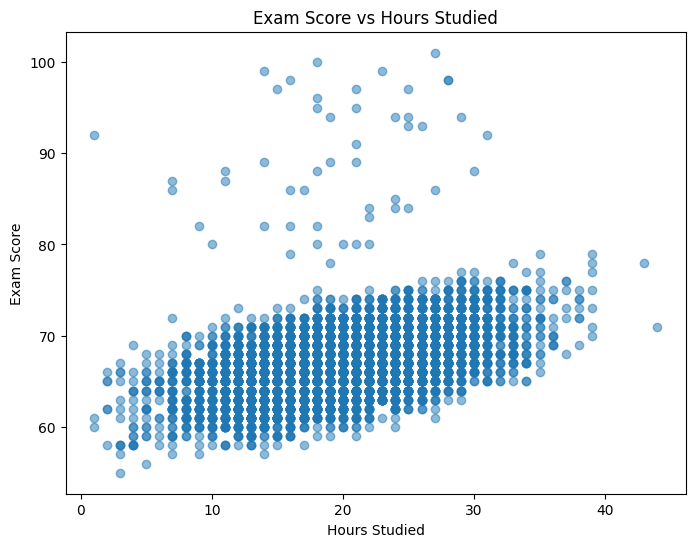

In [6]:
# @title Exam Score vs Hours Studied

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5)
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
_ = plt.ylabel('Exam Score')

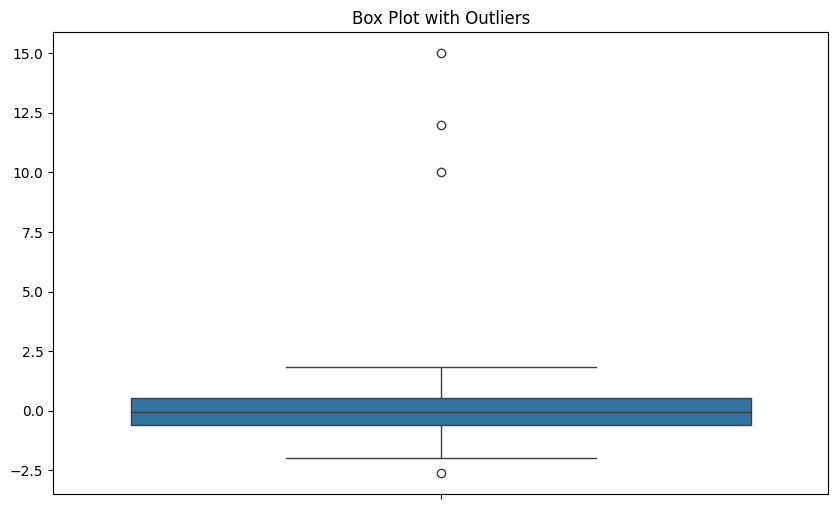

Outliers detected: [-2.6197451 10.        12.        15.       ]


In [12]:
import numpy as np
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=100)
data = np.append(data, [10, 12, 15])   # Normal distribution
 # Add outliers

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)

# Show the plot
plt.title("Box Plot with Outliers")
plt.show()

# Detecting outliers programmatically
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data < lower_bound) | (data > upper_bound)]

print("Outliers detected:", outliers)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [18]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [20]:
count_nulls=df.isnull().sum()
count_null_values=0
for i in count_nulls:
  if i>0:
    count_null_values+=1
    print('Total no. of missing columns',count_null_values)

Total no. of missing columns 1
Total no. of missing columns 2
Total no. of missing columns 3


In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [23]:
count_nulls=df.isnull().sum()
count_null_values=0
for i in count_nulls:
  if i>0:
    count_null_values+=1
    print('Total no. of missing columns',count_null_values)

In [24]:
X= df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']]

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe=OneHotEncoder(sparse_output=False,drop='first')

In [28]:
df['Learning_Disabilities']=ohe.fit_transform(df[['Learning_Disabilities']])

In [29]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,0.0,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,0.0,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,0.0,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,0.0,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,0.0,College,Near,Female,70


In [30]:
Y=df['Learning_Disabilities']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,auc,roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [33]:
scale=StandardScaler()

In [35]:
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [36]:
model=LogisticRegression()

In [37]:
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [38]:
Y_pred=model.predict(X_test_scaled)

In [39]:
CM=confusion_matrix(Y_test,Y_pred)

In [40]:
print('Confusion Matrix \n',CM)

Confusion Matrix 
 [[1144    0]
 [ 132    0]]


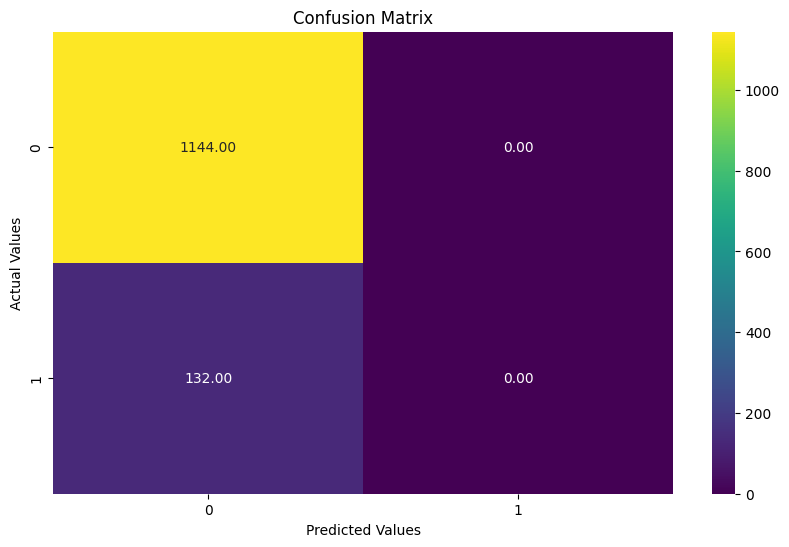

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(CM,annot=True,fmt=".2f",cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [42]:
tp,tn,fp,fn=CM.ravel()

In [43]:
print('True Positive \t',tp)
print('True Negative \t',tn)
print('False Positive \t',fp)
print('False Negative \t', fn)

True Positive 	 1144
True Negative 	 0
False Positive 	 132
False Negative 	 0


In [48]:
accuracy=accuracy_score(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
tpr,fpr,threshold= roc_curve(Y_test,Y_pred)
auc_score=auc(tpr,fpr)
print(f'Accuracy \t {accuracy:.2f}')
print(f'Precision \t {precision:.5f}')
print(f'Recall \t {recall:.2f}')
print(f'Auc score \t {auc_score:.2f}')

Accuracy 	 0.90
Precision 	 0.00000
Recall 	 0.00
Auc score 	 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


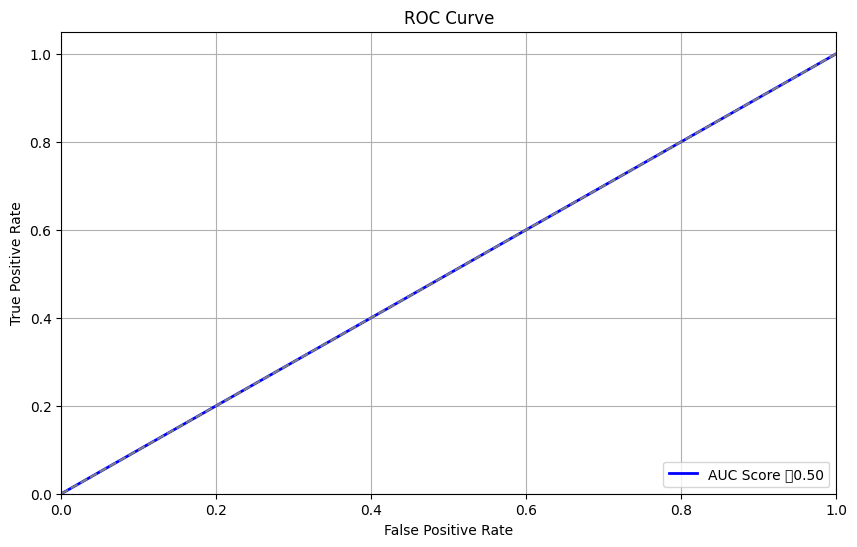

In [51]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='Blue',linewidth=2,label=f'AUC Score \t{auc_score:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='Grey')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
